In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [4]:
second = pd.read_excel('./data/delete_duplicated.xlsx')

In [5]:
tmp = second['식품군'] == ('채소군')

- 채소군에 해당하는 식품군을 가져온다.

In [10]:
tmp = second[509:924]

In [12]:
tmp.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
509,932,채소류,"가시오가피, 순, 데친것",100,55.0,11.99,5.25,0.85,2.07,1.0,0.0,0.14,0,2017
510,934,채소류,"가시오가피, 순, 생것",100,65.0,15.87,5.67,0.70,4.56,1.0,0.0,0.18,0,2017
511,936,채소류,"가죽나물, 생것",100,46.0,9.46,5.33,0.41,0.00,5.0,0.0,0.10,0,2017
512,938,채소류,"가지 가공(기타), 가지절임",100,23.0,5.20,1.40,0.10,NaN,880.0,0.0,-0.03,0,2017
513,940,채소류,"가지, 데친것",100,15.0,4.40,1.00,0.10,1.94,1.0,0.0,0.03,0,2017


In [17]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 509 to 923
Data columns (total 14 columns):
번호            415 non-null int64
식품군           415 non-null object
식품이름          415 non-null object
1회제공량 (g)     415 non-null int64
열량 (kcal)     415 non-null float64
탄수화물 (g)      415 non-null float64
단백질 (g)       415 non-null float64
지방 (g)        415 non-null float64
당류 (g)        210 non-null float64
나트륨 (mg)      371 non-null float64
콜레스테롤 (mg)    227 non-null float64
포화지방산 (g)     217 non-null float64
트랜스지방산 (g)    415 non-null int64
년도            415 non-null int64
dtypes: float64(8), int64(4), object(2)
memory usage: 48.6+ KB


In [15]:
tmp.shape

(415, 14)

# 설정 파리미터

In [14]:
want_kcal = 20

# 단백질 / 탄수화물 
rate = 2 / 3 
plus_rate = rate + rate * 0.1
print("양의 오차 = ", plus_rate)
minus_rate = rate - (rate * 0.1)
print("음의 오차 = ", minus_rate)

양의 오차 =  0.7333333333333333
음의 오차 =  0.6


## index reset

In [18]:
tmp = tmp.reset_index()
del tmp['index']
tmp.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,932,채소류,"가시오가피, 순, 데친것",100,55.0,11.99,5.25,0.85,2.07,1.0,0.0,0.14,0,2017
1,934,채소류,"가시오가피, 순, 생것",100,65.0,15.87,5.67,0.70,4.56,1.0,0.0,0.18,0,2017
2,936,채소류,"가죽나물, 생것",100,46.0,9.46,5.33,0.41,0.00,5.0,0.0,0.10,0,2017
3,938,채소류,"가지 가공(기타), 가지절임",100,23.0,5.20,1.40,0.10,NaN,880.0,0.0,-0.03,0,2017
4,940,채소류,"가지, 데친것",100,15.0,4.40,1.00,0.10,1.94,1.0,0.0,0.03,0,2017


### Nan 값을 0.0 으로 채워 넣는다

In [19]:
tmp = tmp.fillna(0.0)

### 각 열의 값을 가져온다 

In [22]:
kcal = tmp['열량 (kcal)']
amount = tmp['1회제공량 (g)']
carbo = tmp['탄수화물 (g)']
protain = tmp['단백질 (g)']
fatt = tmp['지방 (g)']

### 설정한 칼로리에 따라 비례식을 계산한다.

In [23]:
new_amount = (want_kcal * amount) / kcal 
new_carbo  = (want_kcal * carbo) / kcal 
new_protain  = (want_kcal * protain) / kcal 
new_fatt  = (want_kcal * fatt) / kcal 

### 도출된 각 영양 성분을 가지고 칼로리를 계산한다.

In [24]:
estimate_kcal = (new_carbo * 4) + (new_protain * 4) + (new_fatt * 9)

### 각 열에 데이터를 업데이트 한다.

In [25]:
tmp['열량 (kcal)'] = want_kcal
tmp['1회제공량 (g)'] = new_amount
tmp['탄수화물 (g)'] = new_carbo
tmp['단백질 (g)'] = new_protain
tmp['지방 (g)'] = new_fatt

In [26]:
tmp.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,932,채소류,"가시오가피, 순, 데친것",36.363636,20,4.360000,1.909091,0.309091,2.07,1.0,0.0,0.14,0,2017
1,934,채소류,"가시오가피, 순, 생것",30.769231,20,4.883077,1.744615,0.215385,4.56,1.0,0.0,0.18,0,2017
2,936,채소류,"가죽나물, 생것",43.478261,20,4.113043,2.317391,0.178261,0.00,5.0,0.0,0.10,0,2017
3,938,채소류,"가지 가공(기타), 가지절임",86.956522,20,4.521739,1.217391,0.086957,0.00,880.0,0.0,-0.03,0,2017
4,940,채소류,"가지, 데친것",133.333333,20,5.866667,1.333333,0.133333,1.94,1.0,0.0,0.03,0,2017


## 칼로리 오차를 구한다

In [28]:
error = ( estimate_kcal - want_kcal ) 
tmp['Error'] = error
tmp.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도,Error
0,932,채소류,"가시오가피, 순, 데친것",36.363636,20,4.360000,1.909091,0.309091,2.07,1.0,0.0,0.14,0,2017,7.858182
1,934,채소류,"가시오가피, 순, 생것",30.769231,20,4.883077,1.744615,0.215385,4.56,1.0,0.0,0.18,0,2017,8.449231
2,936,채소류,"가죽나물, 생것",43.478261,20,4.113043,2.317391,0.178261,0.00,5.0,0.0,0.10,0,2017,7.326087
3,938,채소류,"가지 가공(기타), 가지절임",86.956522,20,4.521739,1.217391,0.086957,0.00,880.0,0.0,-0.03,0,2017,3.739130
4,940,채소류,"가지, 데친것",133.333333,20,5.866667,1.333333,0.133333,1.94,1.0,0.0,0.03,0,2017,10.000000


In [29]:
result = tmp

In [30]:
del result['당류 (g)']
del result['나트륨 (mg)']
del result['콜레스테롤 (mg)']
del result['포화지방산 (g)']
del result['트랜스지방산 (g)']
del result['년도']

In [31]:
result.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error
0,932,채소류,"가시오가피, 순, 데친것",36.363636,20,4.360000,1.909091,0.309091,7.858182
1,934,채소류,"가시오가피, 순, 생것",30.769231,20,4.883077,1.744615,0.215385,8.449231
2,936,채소류,"가죽나물, 생것",43.478261,20,4.113043,2.317391,0.178261,7.326087
3,938,채소류,"가지 가공(기타), 가지절임",86.956522,20,4.521739,1.217391,0.086957,3.739130
4,940,채소류,"가지, 데친것",133.333333,20,5.866667,1.333333,0.133333,10.000000


### 영양 성분의 비를 연산한다.

In [32]:
new_rate =  new_fatt/ new_protain

In [34]:
tmp_rate = new_rate.between(minus_rate, plus_rate)
result['survived'] = tmp_rate

In [35]:
result.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived
0,932,채소류,"가시오가피, 순, 데친것",36.363636,20,4.360000,1.909091,0.309091,7.858182,False
1,934,채소류,"가시오가피, 순, 생것",30.769231,20,4.883077,1.744615,0.215385,8.449231,False
2,936,채소류,"가죽나물, 생것",43.478261,20,4.113043,2.317391,0.178261,7.326087,False
3,938,채소류,"가지 가공(기타), 가지절임",86.956522,20,4.521739,1.217391,0.086957,3.739130,False
4,940,채소류,"가지, 데친것",133.333333,20,5.866667,1.333333,0.133333,10.000000,False


In [37]:
serv = [] 
for i in result['survived']:
    if i:
        serv.append(1)
    else :
        serv.append(0)
result['b_servived'] = serv

In [38]:
result.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
0,932,채소류,"가시오가피, 순, 데친것",36.363636,20,4.360000,1.909091,0.309091,7.858182,False,0
1,934,채소류,"가시오가피, 순, 생것",30.769231,20,4.883077,1.744615,0.215385,8.449231,False,0
2,936,채소류,"가죽나물, 생것",43.478261,20,4.113043,2.317391,0.178261,7.326087,False,0
3,938,채소류,"가지 가공(기타), 가지절임",86.956522,20,4.521739,1.217391,0.086957,3.739130,False,0
4,940,채소류,"가지, 데친것",133.333333,20,5.866667,1.333333,0.133333,10.000000,False,0


In [39]:
result.describe()

,번호,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,b_servived
count,415.000000,415.000000,415.0,415.000000,415.000000,415.000000,415.000000,415.000000
mean,1332.501205,75.876910,20.0,4.663297,1.572764,0.214699,6.876538,0.009639
std,231.003042,115.719075,0.0,1.222134,0.767813,0.213921,3.031717,0.097820
min,932.000000,4.866180,20.0,0.848485,0.000000,0.000000,-0.716667,0.000000
25%,1133.000000,35.401003,20.0,3.902381,0.966667,0.083333,5.816762,0.000000
50%,1333.000000,62.500000,20.0,4.625000,1.485714,0.175000,7.572414,0.000000
75%,1531.500000,95.238095,20.0,5.577019,2.160580,0.266667,8.839744,0.000000
max,1730.000000,2000.000000,20.0,8.000000,4.000000,1.757576,15.100000,1.000000


In [40]:
result.shape

(415, 11)

In [42]:
result['survived'].value_counts()

False    411
True       4
Name: survived, dtype: int64

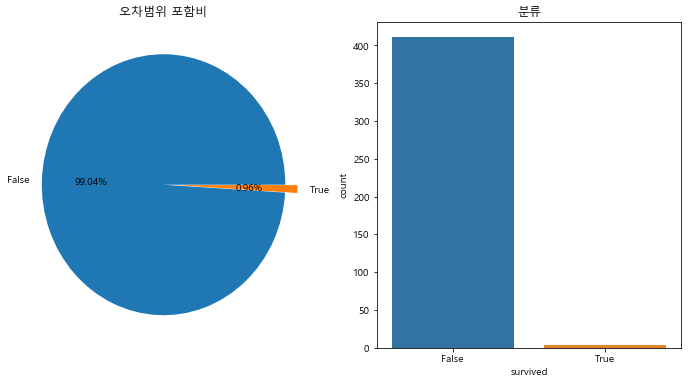

In [43]:
f,ax=plt.subplots(1, 2,figsize=(12,6))

result['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('오차범위 포함비')
ax[0].set_ylabel('')

sns.countplot('survived',data=result,ax=ax[1])
ax[1].set_title('분류')
plt.savefig('result_rate.png')
plt.show()

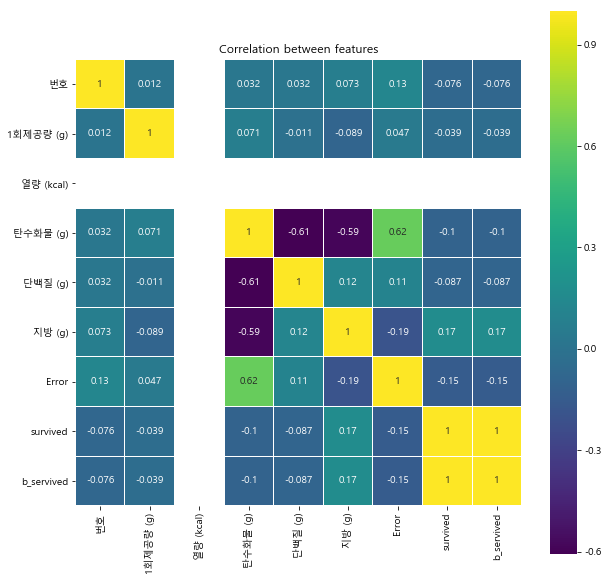

In [44]:
plt.figure(figsize=(10, 10))
sns.heatmap(result.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.savefig('heatmap.png')
plt.show()

In [46]:
include = []
exclude = []
for i, d in enumerate(tmp_rate):
    if d:
        include.append(i)
    else:
        exclude.append(i)

In [47]:
vegitable_include = result.loc[include]
vegitable_exclude = result.loc[exclude]

In [48]:
vegitable_include.to_excel('vegitable_include.xlsx')
vegitable_exclude.to_excel('vegitable_exclude.xlsx')

In [49]:
vegitable_include

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
29,988,채소류,"고추, 붉은고추, 마른것",7.604563,20,4.370342,1.055513,0.662357,7.664639,True,1
54,1038,채소류,"김치, 고들빼기",22.727273,20,2.704545,0.931818,0.613636,0.068182,True,1
145,1214,채소류,"메밀, 새싹, 생것",83.333333,20,1.583333,1.583333,1.000000,1.666667,True,1
231,1380,채소류,"생강 가공(과자류), 편강",5.319149,20,4.941489,0.026596,0.015957,0.015957,True,1


In [50]:
vegitable_exclude

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
0,932,채소류,"가시오가피, 순, 데친것",36.363636,20,4.360000,1.909091,0.309091,7.858182,False,0
1,934,채소류,"가시오가피, 순, 생것",30.769231,20,4.883077,1.744615,0.215385,8.449231,False,0
2,936,채소류,"가죽나물, 생것",43.478261,20,4.113043,2.317391,0.178261,7.326087,False,0
3,938,채소류,"가지 가공(기타), 가지절임",86.956522,20,4.521739,1.217391,0.086957,3.739130,False,0
4,940,채소류,"가지, 데친것",133.333333,20,5.866667,1.333333,0.133333,10.000000,False,0
5,942,채소류,"가지, 마른것",8.620690,20,5.654310,1.252586,0.206897,9.489655,False,0
6,944,채소류,"가지, 생것",133.333333,20,5.813333,1.506667,0.040000,9.640000,False,0
7,946,채소류,"갓, 생것",62.500000,20,4.562500,2.187500,0.125000,8.125000,False,0
8,948,채소류,"강남조나물, 마른것",9.900990,20,4.336634,2.554455,0.039604,7.920792,False,0
9,950,채소류,"갬추, 마른것",8.547009,20,5.401709,1.512821,0.170940,9.196581,False,0


In [51]:
vegitables  = vegitable_include[['번호', '탄수화물 (g)', '단백질 (g)', '지방 (g)']]
vegitables.head()

,번호,탄수화물 (g),단백질 (g),지방 (g)
29,988,4.370342,1.055513,0.662357
54,1038,2.704545,0.931818,0.613636
145,1214,1.583333,1.583333,1.000000
231,1380,4.941489,0.026596,0.015957


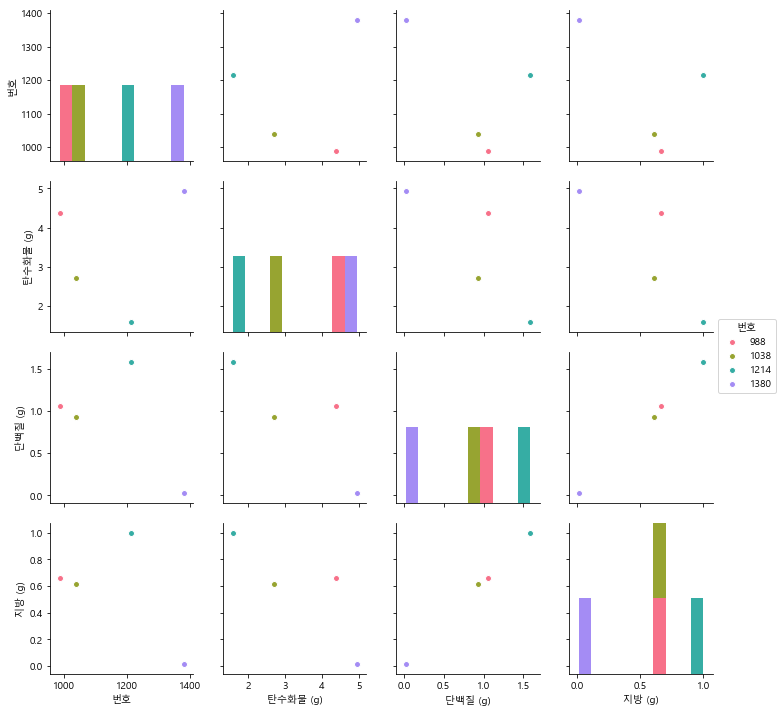

In [53]:
g = sns.pairplot(vegitables, hue='번호',palette="husl")